In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import tempfile
import matplotlib.pyplot as plt
from contextlib import contextmanager


In [3]:
pd.set_option("display.max_columns", None)


In [4]:
DATA_DIR = Path(r"C:\Users\Christopher\Documents\Python Projects\credit_card_transaction")
INPUT_FILE = DATA_DIR / "credit_card_transactions.csv"

df= pd.read_csv(INPUT_FILE)
print("Raw shape:", df.shape)
df.head(10)

Raw shape: (1296675, 24)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Drop index column
df = df.drop(columns=["Unnamed: 0"])

In [7]:
# Trim whitespace on object columns
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip()

In [8]:
# Standardize casing for key text fields
for col in ["merchant", "category", "city", "job"]:
    if col in df.columns:
        df[col] = (df[col].astype(str).str.replace(r"\s+", " ", regex=True).str.title())

In [9]:
if "state" in df.columns:
    df["state"] = df["state"].astype(str).str.strip().str.upper()

In [10]:
# ZIPs as strings to preserve leading zeros
for zcol in ["zip", "merch_zipcode"]:
    if zcol in df.columns:
        df[zcol] = (df[zcol].astype("Int64", errors="ignore").astype(str).str.replace(r"\.0$", "", regex=True).str.replace(r"\.nan$", "", regex=True).str.replace("nan", "", regex=False))

In [11]:
# Remove duplicates (perfer qunique transaction id)
dup_before = len(df)
if "trans_num" in df.columns:
    df = df.drop_duplicates(subset=["trans_num"])
else:
    df = df.drop_duplicates()
print("Duplicates dropped:", dup_before - len(df))

Duplicates dropped: 0


In [12]:
if "amt" in df.columns:
    neg_count = (df["amt"] < 0).sum()
    if neg_count:
        print(f"Warning: {neg_count} negative amounts - dropping them.")
        df = df[df["amt"] >= 0].copy()

In [13]:
# Handle missing essentials (trans_date_trans_time, amt, merchant)
essentials = [c for c in ["trans_date_trans_time", "amt", "merchant"] if c in df.columns]
miss_mask = df[essentials].isna().any(axis=1)
print("Rows missing essentials:", int(miss_mask.sum()))
df = df.loc[~miss_mask].copy()
df

Rows missing essentials: 0


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"Fraud_Rippin, Kub And Mann",Misc_Net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, Counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705
1,2019-01-01 00:00:44,630423337322,"Fraud_Heller, Gutmann And Zieme",Grocery_Pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special Educational Needs Teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,<NA>
2,2019-01-01 00:00:51,38859492057661,Fraud_Lind-Buckridge,Entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature Conservation Officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236
3,2019-01-01 00:01:16,3534093764340240,"Fraud_Kutch, Hermiston And Farrell",Gas_Transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent Attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,<NA>
4,2019-01-01 00:03:06,375534208663984,Fraud_Keeling-Crist,Misc_Pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance Movement Psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,Fraud_Reichel Inc,Entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,<NA>
1296671,2020-06-21 12:12:19,6011149206456997,Fraud_Abernathy And Sons,Food_Dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production Assistant, Television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630
1296672,2020-06-21 12:12:32,3514865930894695,Fraud_Stiedemann Ltd,Food_Dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval Architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351
1296673,2020-06-21 12:13:36,2720012583106919,"Fraud_Reinger, Weissnat And Strosin",Food_Dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer Coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367


In [14]:
# Dates
if "trans_date_trans_time" in df.columns:
    df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], errors="coerce")
    bad_dates = df["trans_date_trans_time"].isna().sum()
    if bad_dates:
        print("Unparseable transaction dates:", bad_dates)
        df = df.dropna(subset=["trans_date_trans_time"])

In [15]:
# DOB into datetime for age calculation
if "dob" in df.columns:
    df["dob"] = pd.to_datetime(df["dob"], errors="coerce")

In [16]:
# Gender as categorical
if "gender" in df.columns:
    df["gender"] = df["gender"].astype("category")

In [17]:
for column, dtype in df.dtypes.items():
    # Check if the dtype is a numeric type
    if pd.api.types.is_numeric_dtype(dtype):
        print(column)

cc_num
amt
lat
long
city_pop
unix_time
merch_lat
merch_long
is_fraud


In [18]:
# Ensure numeric floats where expected
for c in ["lat", "long", "merch_lat", "merch_long", "amt", "city_pop"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

In [19]:
# (a) Transaction time breakdown
ts= "tans_date_trans_time"
if ts in df.columns:
    df["year"] = df[ts].dt.year
    df["month"] = df[ts].dt.to_period("M")
    df["day"] = df[ts].dt.date
    df["hour"] = df[ts].dt.hour
    df["dayofweek"] = df[ts].dt.dayofweek # Monday=0, Sunday=6

    def hour_band(h):
        if 5<= h <12: return "Morning"
        if 12 <= h < 17: return "Afternoon"
        if 17 <= h < 21: return "Evening"
        return "Night"
    df["hour_band"] = df["hour"].apply(hour_band)

In [20]:
# # (b) Customer age (in years, clipped to reasonable range)
# if "dob" in df.columns and ts in df.columns:
#     age_days = (df[ts].dt.date - df["dob"].dt.date).dt.days
#     df["age"] = (age_days / 365.25).round(1)
#     df.loc[(df["age"] < 10) | (df["age"] > 100), "age"] = np.nan

In [21]:
# (b) Customer age (in years, with bands)
import numpy as np

TS_COL = "trans_date_trans_time"
DOB_COL = "dob"

# Ensure datetimes
df[TS_COL] = pd.to_datetime(df[TS_COL], errors="coerce")
df[DOB_COL] = pd.to_datetime(df[DOB_COL], errors="coerce")

mask_valid = df[TS_COL].notna() & df[DOB_COL].notna()
df.loc[mask_valid, "age"] = ((df.loc[mask_valid, TS_COL] - df.loc[mask_valid, DOB_COL]).dt.days / 365.25).round(1)

# Clip unrealistic ages
df.loc[(df["age"] < 10) | (df["age"] > 100), "age"] = np.nan

# Age bands
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
labels = ["<18", "18–24", "25–34", "35–44", "45–54", "55–64", "65–74", "75+"]
df["age_band"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

In [22]:
# (c) Distance between customer and merchant (Haversine, km)
def haversine_km(lat1, lon1, lat2, lon2):
    # All args in radians
    R = 6371.0088
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

needed = {"lat","long","merch_lat","merch_long"}
if needed.issubset(df.columns):
    # Convert to radians
    lat1 = np.radians(df["lat"].astype(float))
    lon1 = np.radians(df["long"].astype(float))
    lat2 = np.radians(df["merch_lat"].astype(float))
    lon2 = np.radians(df["merch_long"].astype(float))
    df["cust_merchant_km"] = haversine_km(lat1, lon1, lat2, lon2)

In [23]:
# (d) Recurring spend flag: (merchant, amt) across distinct months
if {"merchant", "amt", "month"}.issubset(df.columns):
    pair_months = (
        df.groupby(["merchant", "amt"])["month"]
          .nunique()
          .reset_index(name="distinct_months")
    )
    pair_months["is_recurring_pair"] = pair_months["distinct_months"] >= 3  # ≥3 months
    df = df.merge(
        pair_months[["merchant", "amt", "is_recurring_pair"]],
        on=["merchant", "amt"],
        how="left"
    )
    df["is_recurring_pair"] = df["is_recurring_pair"].fillna(False)

In [24]:
# (e) Outlier & size bands (based on amount)
if "amt" in df.columns:
    q95 = df["amt"].quantile(0.95)
    df["is_outlier_amt"] = df["amt"] > q95
    df["txn_size_band"] = pd.cut(
        df["amt"],
        bins=[-np.inf, 50, 500, np.inf],
        labels=["Small", "Medium", "Large"]
    )

In [25]:
df["category"].value_counts()  # top 20 categories by frequency

category
Gas_Transport     131659
Grocery_Pos       123638
Home              123115
Shopping_Pos      116672
Kids_Pets         113035
Shopping_Net       97543
Entertainment      94014
Food_Dining        91461
Personal_Care      90758
Health_Fitness     85879
Misc_Pos           79655
Misc_Net           63287
Grocery_Net        45452
Travel             40507
Name: count, dtype: int64

In [26]:
# ============================
# 5f) High-level spend grouping
# ============================

# 0) Handle the Fraud_ artifact cleanly (Step 2/3 area, but safe to run here too)
if "merchant" in df.columns:
    df["merchant_has_fraud_tag"] = df["merchant"].str.startswith("Fraud_", na=False)
    df["merchant_clean"] = df["merchant"].str.replace(r"^Fraud_", "", regex=True)

    # Optional: normalize common company suffixes to improve consolidation (light touch)
    df["merchant_clean"] = (
        df["merchant_clean"]
        .str.replace(r"\b(inc|llc|ltd|plc|corp|co)\b\.?", "", case=False, regex=True)
        .str.replace(r"\s{2,}", " ", regex=True)
        .str.strip()
    )

# 1) Category-first mapping (based on your actual categories)
_CAT_TO_GROUP = {
    # Travel & transport
    "travel": "Travel",
    "gas_transport": "Travel",

    # Food & grocery
    "food_dining": "Food & Beverage",
    "grocery_pos": "Food & Beverage",
    "grocery_net": "Food & Beverage",

    # Shopping & personal
    "shopping_pos": "Shopping & Personal",
    "shopping_net": "Shopping & Personal",
    "home": "Shopping & Personal",
    "personal_care": "Shopping & Personal",
    "kids_pets": "Shopping & Personal",

    # Health & wellness
    "health_fitness": "Health & Wellness",

    # Entertainment
    "entertainment": "Entertainment",

    # Misc
    "misc_pos": "Other / Miscellaneous",
    "misc_net": "Other / Miscellaneous",
}

# 2) Light merchant-based fallback (used ONLY if category missing/unmapped)
#    Keep this minimal to avoid brittle rules & leakage.
def merchant_fallback_group(merchant_clean: str) -> str:
    if not isinstance(merchant_clean, str):
        return "Other"
    m = merchant_clean.lower()
    if any(k in m for k in ["uber", "lyft", "delta", "marriott", "hilton", "airbnb", "airlines"]):
        return "Travel"
    if any(k in m for k in ["starbucks", "mcdonald", "grubhub", "doordash", "coffee", "restaurant"]):
        return "Food & Beverage"
    if any(k in m for k in ["staples", "office depot", "office"]):
        return "Shopping & Personal"
    if any(k in m for k in ["adobe", "microsoft", "github", "slack"]):
        return "SaaS / Software"
    return "Other"

def map_spend_group_safe(category: str, merchant_clean: str) -> str:
    # 1) Prefer category (your dataset’s canonical labels)
    if isinstance(category, str):
        g = _CAT_TO_GROUP.get(category.strip().lower())
        if g:
            return g
    # 2) Fallback to very light merchant heuristics (no Fraud_ prefix involved)
    return merchant_fallback_group(merchant_clean)

req = {"category", "merchant_clean"}
if req.issubset(df.columns):
    df["spend_group"] = [
        map_spend_group_safe(cat, m)
        for cat, m in zip(df["category"], df["merchant_clean"])
    ]


In [27]:
df["spend_group"].value_counts(dropna=False)


spend_group
Shopping & Personal      541123
Food & Beverage          260551
Travel                   172166
Other / Miscellaneous    142942
Entertainment             94014
Health & Wellness         85879
Name: count, dtype: int64

In [28]:
df.loc[df["spend_group"] == "Other / Miscellaneous", "category"].value_counts()


category
Misc_Pos    79655
Misc_Net    63287
Name: count, dtype: int64

In [29]:
print("\n=== Validation Snapshot ===")
print("Shape:", df.shape)
if ts in df.columns:
    print("Date range:", df[ts].min(), "→", df[ts].max())
print("Amount stats:")
print(df["amt"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))
for col in ["spend_group", "txn_size_band", "is_recurring_pair", "is_outlier_amt"]:
    if col in df.columns:
        print(f"\n{col} value counts:\n", df[col].value_counts(dropna=False).head(10))


=== Validation Snapshot ===
Shape: (1296675, 31)
Amount stats:
count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
50%      4.752000e+01
90%      1.366700e+02
95%      1.963100e+02
99%      5.459926e+02
max      2.894890e+04
Name: amt, dtype: float64

spend_group value counts:
 spend_group
Shopping & Personal      541123
Food & Beverage          260551
Travel                   172166
Other / Miscellaneous    142942
Entertainment             94014
Health & Wellness         85879
Name: count, dtype: int64

txn_size_band value counts:
 txn_size_band
Small     672299
Medium    608745
Large      15631
Name: count, dtype: int64

is_outlier_amt value counts:
 is_outlier_amt
False    1231853
True       64822
Name: count, dtype: int64


In [30]:
OUTPUT_CSV = DATA_DIR / "credit_card_transactions_clean.csv"
OUTPUT_PARQUET = DATA_DIR / "credit_card_transactions_clean.parquet"

df.to_csv(OUTPUT_CSV, index=False)
try:
    df.to_parquet(OUTPUT_PARQUET, index=False)
    print(f"\nSaved cleaned data to:\n - {OUTPUT_CSV}\n - {OUTPUT_PARQUET}")
except Exception as e:
    print(f"\nSaved cleaned data to:\n - {OUTPUT_CSV}\n(Parquet save skipped: {e})")


Saved cleaned data to:
 - C:\Users\Christopher\Documents\Python Projects\credit_card_transaction\credit_card_transactions_clean.csv
 - C:\Users\Christopher\Documents\Python Projects\credit_card_transaction\credit_card_transactions_clean.parquet


In [31]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,age,age_band,cust_merchant_km,is_outlier_amt,txn_size_band,merchant_has_fraud_tag,merchant_clean,spend_group
0,2019-01-01 00:00:18,2703186189652095,"Fraud_Rippin, Kub And Mann",Misc_Net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, Counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705,30.8,25–34,78.597677,False,Small,True,"Rippin, Kub And Mann",Other / Miscellaneous
1,2019-01-01 00:00:44,630423337322,"Fraud_Heller, Gutmann And Zieme",Grocery_Pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special Educational Needs Teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,<NA>,40.5,35–44,30.212217,False,Medium,True,"Heller, Gutmann And Zieme",Food & Beverage
2,2019-01-01 00:00:51,38859492057661,Fraud_Lind-Buckridge,Entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature Conservation Officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236,57.0,55–64,108.206232,True,Medium,True,Lind-Buckridge,Entertainment
3,2019-01-01 00:01:16,3534093764340240,"Fraud_Kutch, Hermiston And Farrell",Gas_Transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent Attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,<NA>,52.0,45–54,95.673363,False,Small,True,"Kutch, Hermiston And Farrell",Travel
4,2019-01-01 00:03:06,375534208663984,Fraud_Keeling-Crist,Misc_Pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance Movement Psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844,32.8,25–34,77.556851,False,Small,True,Keeling-Crist,Other / Miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,Fraud_Reichel Inc,Entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,<NA>,58.6,55–64,119.752302,False,Small,True,Reichel,Entertainment
1296671,2020-06-21 12:12:19,6011149206456997,Fraud_Abernathy And Sons,Food_Dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production Assistant, Television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630,40.5,35–44,75.104189,False,Medium,True,Abernathy And Sons,Food & Beverage
1296672,2020-06-21 12:12:32,3514865930894695,Fraud_Stiedemann Ltd,Food_Dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval Architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351,52.8,45–54,99.047870,False,Medium,True,Stiedemann,Food & Beverage
1296673,2020-06-21 12:13:36,2720012583106919,"Fraud_Reinger, Weissnat And Strosin",Food_Dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer Coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367,39.8,35–44,84.627769,False,Medium,True,"Reinger, Weissnat And Strosin",Food & Beverage


In [32]:
# # Create temporary HTML file
# with tempfile.NamedTemporaryFile(mode='w', delete=False, suffix='.html') as f:
#     df.to_html(f.name)
#     webbrowser.open(f'file://{f.name}')

### **Spend Trends: Monthly/quarterly spend trends across groups**

In [34]:
# Cell 2: Chart style (no "pew" words)

def chart_rc(base_size=12, font_family="DejaVu Sans"):
    """
    Returns a dict of rcParams for a clean, publication-style chart.
    """
    return {
        "font.size": base_size,
        "font.family": font_family,
        "text.color": "#222222",
        "figure.facecolor": "white",
        "axes.facecolor": "white",
        "axes.edgecolor": "white",
        "axes.labelcolor": "#333333",
        "axes.titlesize": base_size * 1.35,
        "axes.titleweight": "bold",
        "axes.titlepad": 6,
        "xtick.color": "#424242",
        "ytick.color": "#222222",
        "axes.grid": False,
        "legend.frameon": False,
    }

# Neutral, accessible palette (tweak as desired)
GROUP_COLORS = {
    "Shopping & Personal":     "#1B9E77",  # teal/green
    "Food & Beverage":         "#D95F02",  # burnt orange
    "Travel":                  "#7570B3",  # muted purple
    "Entertainment":           "#E6AB02",  # mustard yellow
    "Health & Wellness":       "#E7298A",  # rose/red-pink
    "Other / Miscellaneous":   "#66A61E",  # olive green
}

# Optional general-purpose colors if you need them later
UP_COLOR   = "#4B6E82"
DOWN_COLOR = "#8C8C8C"


In [35]:
# Cell 3: rc context manager
@contextmanager
def use_rc(rc_dict):
    """
    Temporarily applies rcParams from a dict, then restores the previous state.
    """
    old_rc = plt.rcParams.copy()
    try:
        plt.rcParams.update(rc_dict)
        yield
    finally:
        plt.rcParams.update(old_rc)


In [36]:
# Cell 4: helpers for spend aggregation by period

def spend_by_period(df, ts_col, group_col="spend_group", value_col="amt", period="M"):
    """
    Aggregates spend by a time period (M=month, Q=quarter) and a group column.
    Returns a tidy DataFrame with columns: [period, group_col, value_col, period_end].
    """
    if ts_col not in df.columns:
        raise KeyError(f"Timestamp column '{ts_col}' not in DataFrame.")

    if group_col not in df.columns:
        raise KeyError(f"Group column '{group_col}' not in DataFrame.")

    if value_col not in df.columns:
        raise KeyError(f"Value column '{value_col}' not in DataFrame.")

    # group by pandas Period
    g = (
        df.groupby([df[ts_col].dt.to_period(period), group_col])[value_col]
          .sum()
          .reset_index()
          .rename(columns={ts_col: "period"})
    )
    # make a timestamp for plotting on x-axis
    g["period_end"] = g["period"].dt.to_timestamp()
    g = g.rename(columns={group_col: "series", value_col: "value"})
    return g[["period", "period_end", "series", "value"]]


In [37]:
import matplotlib.ticker as mticker

def custom_chart_v1(
    data: pd.DataFrame,
    x_col: str = "period_end",
    y_col: str = "value",
    series_col: str = "series",
    title: str = "",
    ylabel: str = "Total Spend ($)",
    figsize=(12, 6),
    palette: dict | None = None,
    markers: bool = True,
):
    """
    Line chart with one line per series, using the custom rc style.
    Expects a tidy DataFrame with [x_col, y_col, series_col].
    """
    if palette is None:
        palette = {}

    with use_rc(chart_rc()):
        plt.figure(figsize=figsize)
        ax = plt.gca()

        for s in data[series_col].unique():
            subset = data[data[series_col] == s].sort_values(x_col)
            color = palette.get(s, None)
            ax.plot(
                subset[x_col],
                subset[y_col],
                marker="o" if markers else None,
                label=s,
                color=color,
            )

        ax.set_title(title)
        ax.set_xlabel("Time")
        ax.set_ylabel(ylabel)

        # ✅ Force normal number formatting with commas
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


In [38]:
# Cell 6: build monthly & quarterly tables once, reuse later

ts = "trans_date_trans_time"

monthly_spend_tbl   = spend_by_period(df, ts_col=ts, group_col="spend_group", value_col="amt", period="M")
quarterly_spend_tbl = spend_by_period(df, ts_col=ts, group_col="spend_group", value_col="amt", period="Q")


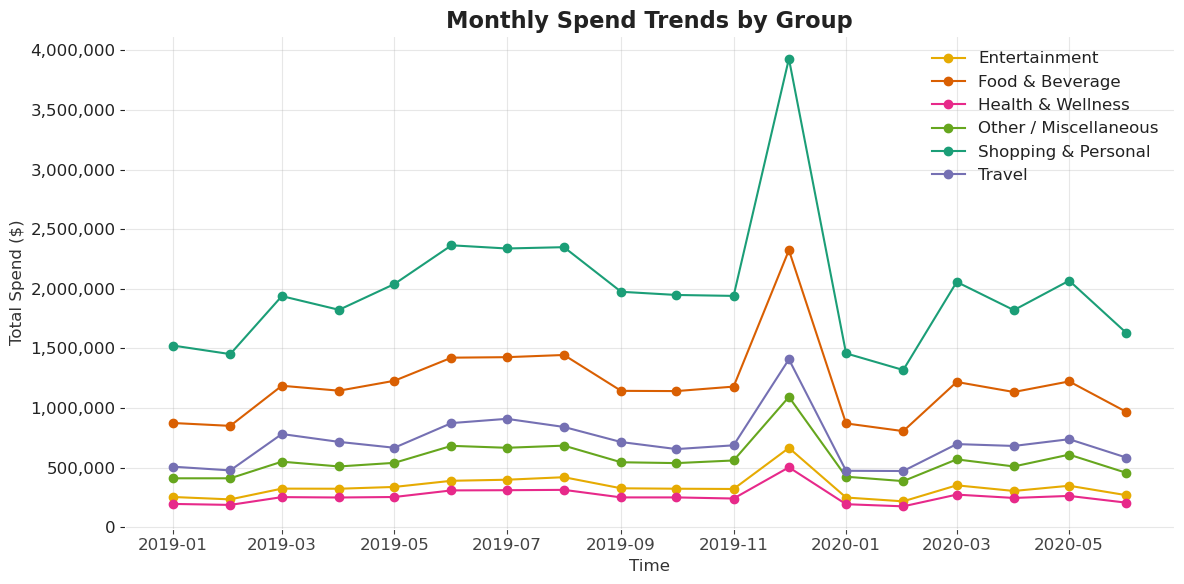

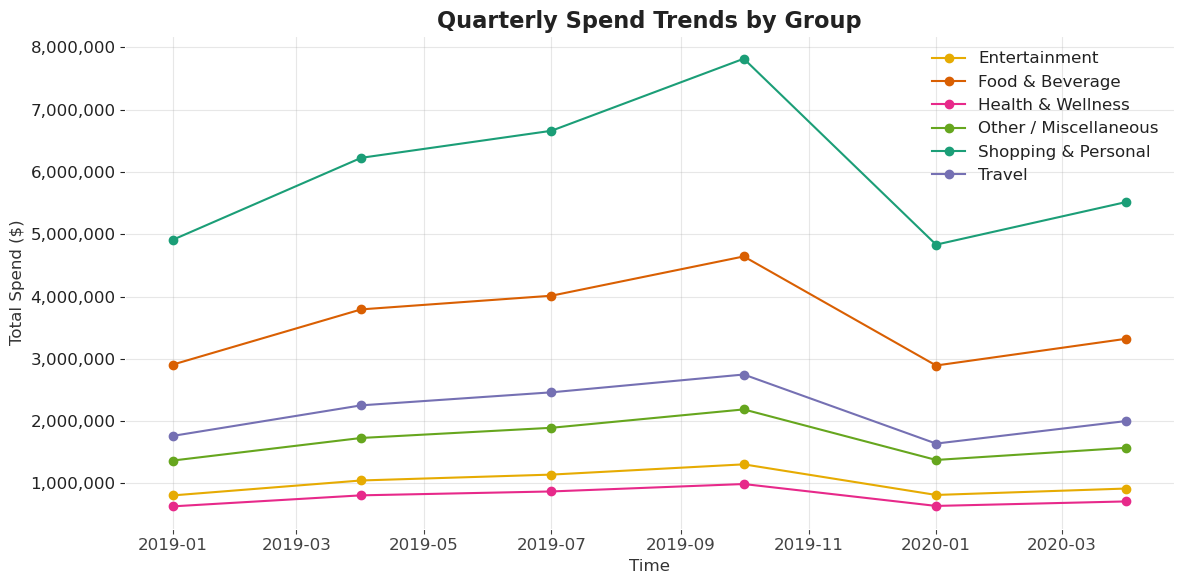

In [39]:
# Cell 7: plot monthly & quarterly trends

custom_chart_v1(
    monthly_spend_tbl,
    title="Monthly Spend Trends by Group",
    ylabel="Total Spend ($)",
    palette=GROUP_COLORS,
)

custom_chart_v1(
    quarterly_spend_tbl,
    title="Quarterly Spend Trends by Group",
    ylabel="Total Spend ($)",
    figsize=(12, 6),
    palette=GROUP_COLORS,
)


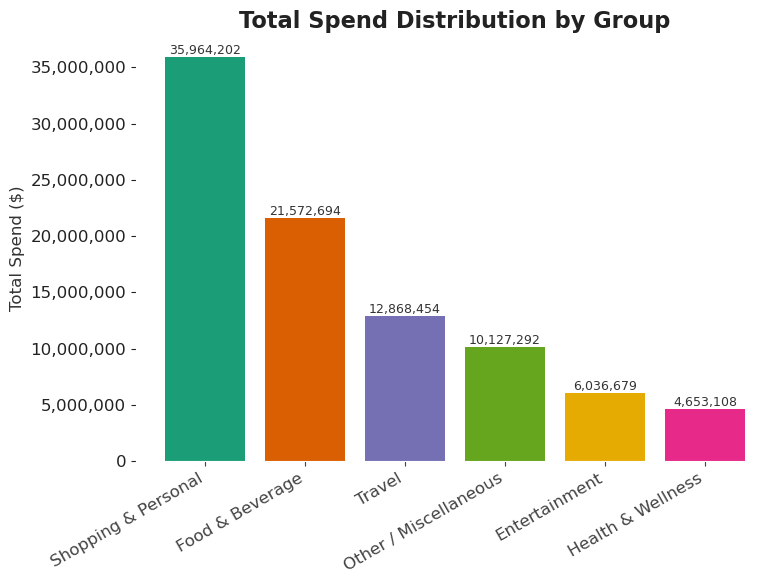

In [40]:
# ===========================================
# 3b-i. Distribution of Spend by Spend Group
# ===========================================

# Aggregate total spend by spend_group
group_spend = (
    df.groupby("spend_group")["amt"]
      .sum()
      .reset_index()
      .sort_values("amt", ascending=False)
)

# Bar plot with custom style
def plot_spend_distribution(data, group_col="spend_group", value_col="amt"):
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=(8,6))
        bars = ax.bar(
            data[group_col],
            data[value_col],
            color=[GROUP_COLORS.get(g, "#999999") for g in data[group_col]]
        )
        ax.set_title("Total Spend Distribution by Group")
        ax.set_ylabel("Total Spend ($)")
        ax.set_xlabel("")
        
        # Format y-axis with commas
        import matplotlib.ticker as mticker
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))

        # Rotate x labels for readability
        plt.xticks(rotation=30, ha="right")

        # Annotate bars with values
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width()/2, 
                height,
                f"{height:,.0f}",
                ha="center", va="bottom", fontsize=9, color="#333333"
            )

        plt.tight_layout()
        plt.show()

plot_spend_distribution(group_spend)


In [41]:
# Cell R1: recurring share tables

# Ensure the recurring flag exists. If not, compute it from (merchant, amt) across months.
if "is_recurring_pair" not in df.columns:
    if {"merchant_clean", "amt", "trans_date_trans_time"}.issubset(df.columns):
        df["month"] = df["trans_date_trans_time"].dt.to_period("M")
        pair_months = (
            df.groupby(["merchant_clean", "amt"])["month"]
              .nunique()
              .reset_index(name="distinct_months")
        )
        pair_months["is_recurring_pair"] = pair_months["distinct_months"] >= 3
        df = df.merge(
            pair_months[["merchant_clean", "amt", "is_recurring_pair"]],
            on=["merchant_clean", "amt"],
            how="left"
        )
        df["is_recurring_pair"] = df["is_recurring_pair"].fillna(False)
    else:
        raise ValueError("Missing columns to compute recurring flag. Please create 'is_recurring_pair' in prep.")

# Overall share (% of transactions)
recurring_overall_pct = df["is_recurring_pair"].mean() * 100

# Share by spend_group (% of transactions)
recurring_by_group = (
    df.groupby("spend_group")["is_recurring_pair"]
      .mean()
      .mul(100)
      .reset_index(name="share_pct")
      .sort_values("share_pct", ascending=False)
)

# Monthly recurring share (% of transactions) per spend_group
ts = "trans_date_trans_time"
recurring_monthly = (
    df.groupby([df[ts].dt.to_period("M"), "spend_group"])["is_recurring_pair"]
      .mean()
      .mul(100)
      .reset_index()
      .rename(columns={ts: "period"})
)
recurring_monthly["period_end"] = recurring_monthly["period"].dt.to_timestamp()
recurring_monthly = recurring_monthly.rename(columns={"spend_group": "series", "is_recurring_pair": "value"})

# Quarterly recurring share (optional)
recurring_quarterly = (
    df.groupby([df[ts].dt.to_period("Q"), "spend_group"])["is_recurring_pair"]
      .mean()
      .mul(100)
      .reset_index()
      .rename(columns={ts: "period"})
)
recurring_quarterly["period_end"] = recurring_quarterly["period"].dt.to_timestamp()
recurring_quarterly = recurring_quarterly.rename(columns={"spend_group": "series", "is_recurring_pair": "value"})


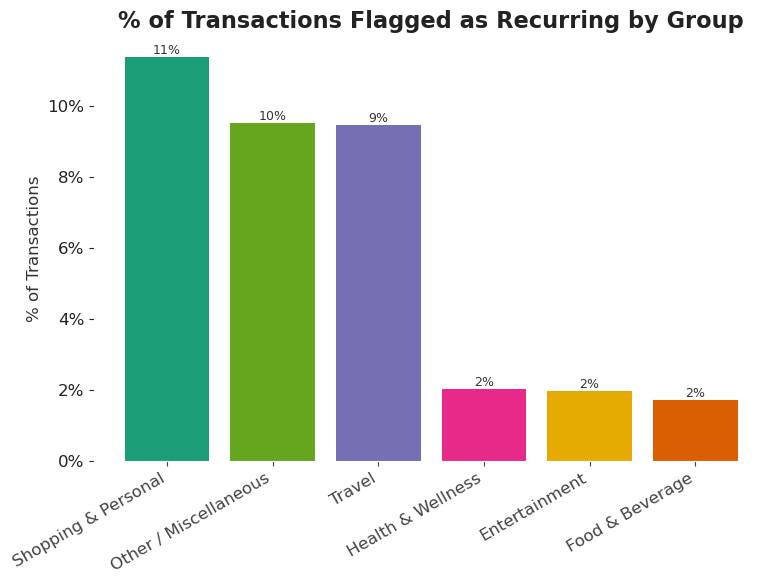

Overall recurring share: 7.7%


In [42]:
# Cell R2: bar chart — recurring % by spend_group

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_recurring_share_by_group(data, group_col="spend_group", value_col="share_pct"):
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=(8,6))
        colors = [GROUP_COLORS.get(g, "#999999") for g in data[group_col]]
        bars = ax.bar(data[group_col], data[value_col], color=colors)

        ax.set_title("% of Transactions Flagged as Recurring by Group")
        ax.set_xlabel("")
        ax.set_ylabel("% of Transactions")

        # Percent formatter
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"{v:.0f}%"))

        # Rotate labels and tidy up
        plt.xticks(rotation=30, ha="right")

        # Annotate bars
        for bar, val in zip(bars, data[value_col]):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                f"{val:.0f}%",
                ha="center", va="bottom", fontsize=9, color="#333333"
            )

        plt.tight_layout()
        plt.show()

# Run the plot
plot_recurring_share_by_group(recurring_by_group)
print(f"Overall recurring share: {recurring_overall_pct:.1f}%")


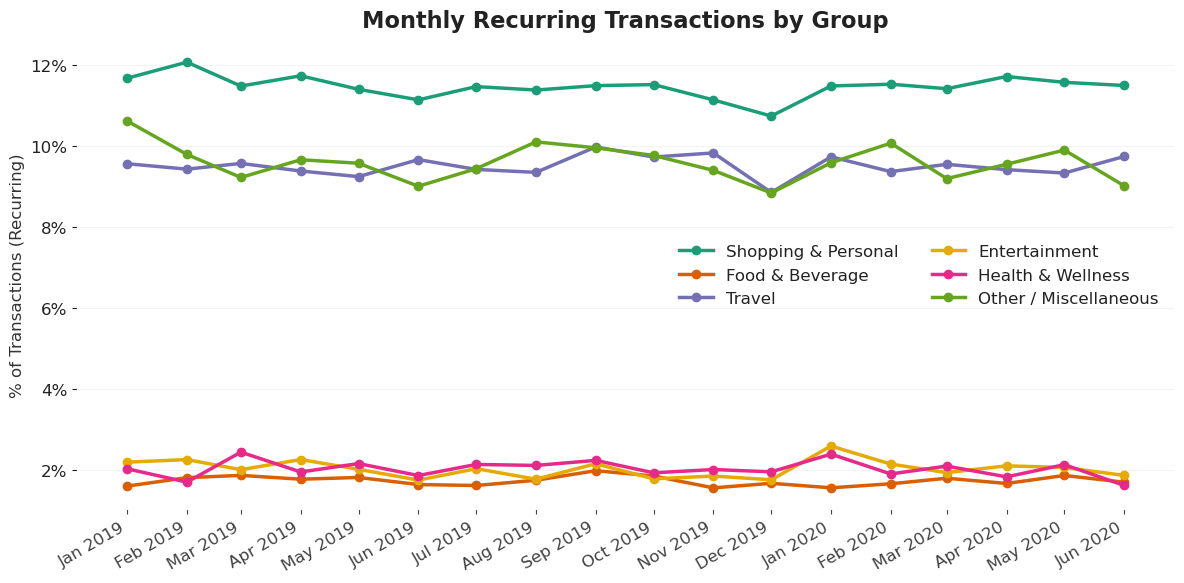

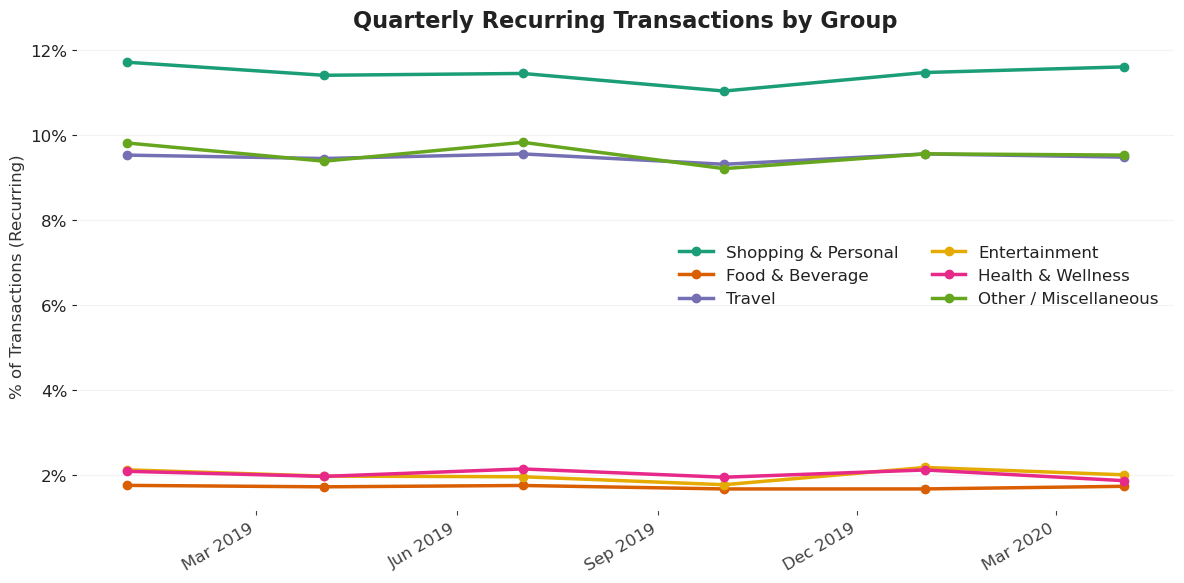

In [43]:
# Cell R3: line chart — recurring % over time

import matplotlib.dates as mdates

def plot_recurring_share_over_time(
    data,                  # tidy: [period_end, series, value]
    title="Recurring Transactions Over Time",
    ylabel="% of Transactions (Recurring)",
    date_freq="M",         # "M" or "Q"
    series_order=None,
    figsize=(12,6),
):
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=figsize)

        # Optional fixed order for consistent legend/colors
        plot_data = data.copy()
        if series_order is not None:
            cat = pd.api.types.CategoricalDtype(categories=series_order, ordered=True)
            plot_data["series"] = plot_data["series"].astype(cat)
            plot_data = plot_data.sort_values(["series", "period_end"])

        # Draw one line per series
        for s in plot_data["series"].dropna().unique():
            sub = plot_data[plot_data["series"] == s].sort_values("period_end")
            ax.plot(
                sub["period_end"],
                sub["value"],
                label=str(s),
                color=GROUP_COLORS.get(s, None),
                marker="o",
                linewidth=2.5
            )

        ax.set_title(title, pad=10)
        ax.set_xlabel("")
        ax.set_ylabel(ylabel)

        # Percent formatter
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"{v:.0f}%"))

        # X-date ticks
        if date_freq.upper().startswith("Q"):
            ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[3,6,9,12]))
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
        else:
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

        # Light horizontal grid
        ax.grid(True, which="major", axis="y", alpha=0.15)

        # Legend
        if series_order is not None:
            handles, labels = ax.get_legend_handles_labels()
            order_idx = {name: i for i, name in enumerate(series_order)}
            pairs = sorted(zip(labels, handles), key=lambda x: order_idx.get(x[0], 1e9))
            labels, handles = zip(*pairs)
            ax.legend(handles, labels, frameon=False, ncol=2)
        else:
            ax.legend(frameon=False, ncol=2)

        plt.tight_layout()
        plt.show()

# Example calls:
ORDER = [
    "Shopping & Personal",
    "Food & Beverage",
    "Travel",
    "Entertainment",
    "Health & Wellness",
    "Other / Miscellaneous",
]

plot_recurring_share_over_time(
    recurring_monthly,
    title="Monthly Recurring Transactions by Group",
    date_freq="M",
    series_order=ORDER,
)

plot_recurring_share_over_time(
    recurring_quarterly,
    title="Quarterly Recurring Transactions by Group",
    date_freq="Q",
    series_order=ORDER,
    figsize=(12,6),
)


### **Outlier Spending**

In [45]:
# Step O2: Summarize outlier counts and values

# Overall count & total value
outlier_count = df["is_outlier_amt"].sum()
outlier_value = df.loc[df["is_outlier_amt"], "amt"].sum()
total_value = df["amt"].sum()
outlier_pct_value = (outlier_value / total_value) * 100

print(f"Outlier transactions: {outlier_count:,}")
print(f"Total outlier spend: ${outlier_value:,.0f} ({outlier_pct_value:.1f}% of all spend)")


Outlier transactions: 64,822
Total outlier spend: $28,715,737 (31.5% of all spend)


In [46]:
# Step O3: outliers by spend_group

outlier_by_group = (
    df.groupby("spend_group")["is_outlier_amt"]
      .mean()        # share of transactions that are outliers
      .mul(100)
      .reset_index(name="outlier_share_pct")
      .sort_values("outlier_share_pct", ascending=False)
)

# also get total outlier spend by group
outlier_value_by_group = (
    df[df["is_outlier_amt"]]
      .groupby("spend_group")["amt"]
      .sum()
      .reset_index(name="outlier_spend")
      .sort_values("outlier_spend", ascending=False)
)

#outlier_by_group.head(), outlier_value_by_group.head()

In [47]:
outlier_by_group

,spend_group,outlier_share_pct
3,Other / Miscellaneous,9.426201
1,Food & Beverage,5.625002
4,Shopping & Personal,4.766384
0,Entertainment,4.197247
5,Travel,3.088879
2,Health & Wellness,1.905006


In [48]:
outlier_value_by_group

,spend_group,outlier_spend
4,Shopping & Personal,13654604.76
3,Other / Miscellaneous,5893823.01
5,Travel,4273531.11
1,Food & Beverage,3366338.34
0,Entertainment,1125327.37
2,Health & Wellness,402112.17


In [49]:
# Step O4: outliers by merchant (top 10 by value)

outlier_by_merchant = (
    df[df["is_outlier_amt"]]
      .groupby("merchant_clean")["amt"]
      .sum()
      .reset_index()
      .sort_values("amt", ascending=False)
      .head(10)
)

outlier_by_merchant


,merchant_clean,amt
290,Kuhic,183460.77
292,Kuhn,175077.55
60,Boyer,170951.03
410,Price,156260.00
403,Pfeffer And Sons,148194.31
393,Pacocha-Bauch,141374.20
324,Lemke-Gutmann,140411.71
464,"Schmeler, Bashirian And Price",140399.12
543,"Watsica, Haag And Considine",139988.15
569,"Zboncak, Rowe And Murazik",138011.64


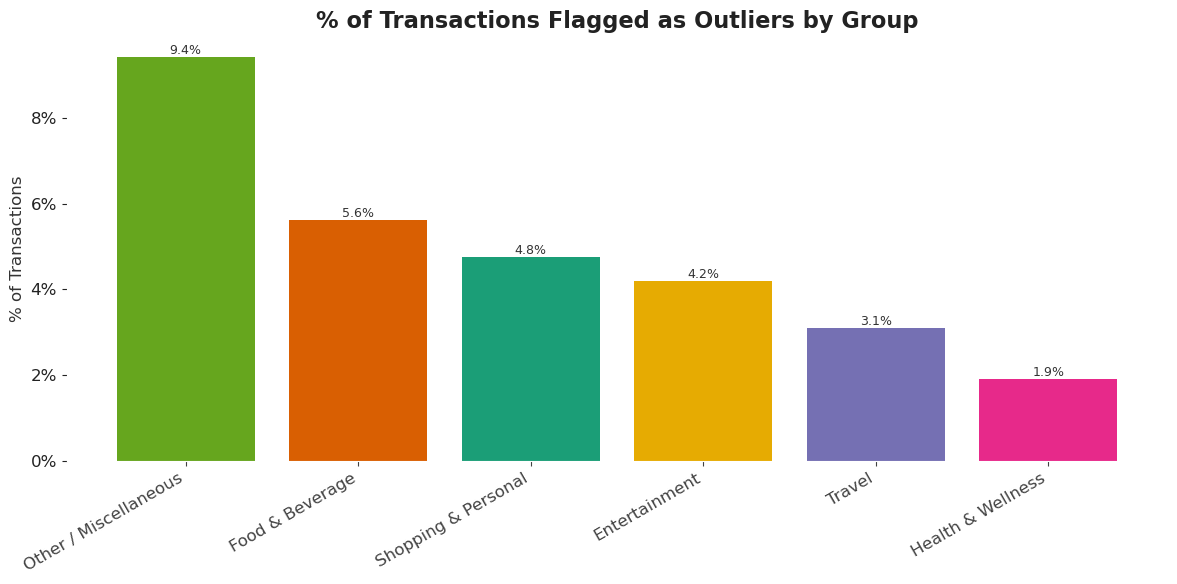

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_outlier_share_by_group(data, group_col="spend_group", value_col="outlier_share_pct"):
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=(12,6))
        colors = [GROUP_COLORS.get(g, "#999999") for g in data[group_col]]
        bars = ax.bar(data[group_col], data[value_col], color=colors)

        ax.set_title("% of Transactions Flagged as Outliers by Group")
        ax.set_ylabel("% of Transactions")
        ax.set_xlabel("")

        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"{v:.0f}%"))
        plt.xticks(rotation=30, ha="right")

        for bar, val in zip(bars, data[value_col]):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                f"{val:.1f}%",
                ha="center", va="bottom", fontsize=9, color="#333333"
            )

        plt.tight_layout()
        plt.show()

plot_outlier_share_by_group(outlier_by_group)


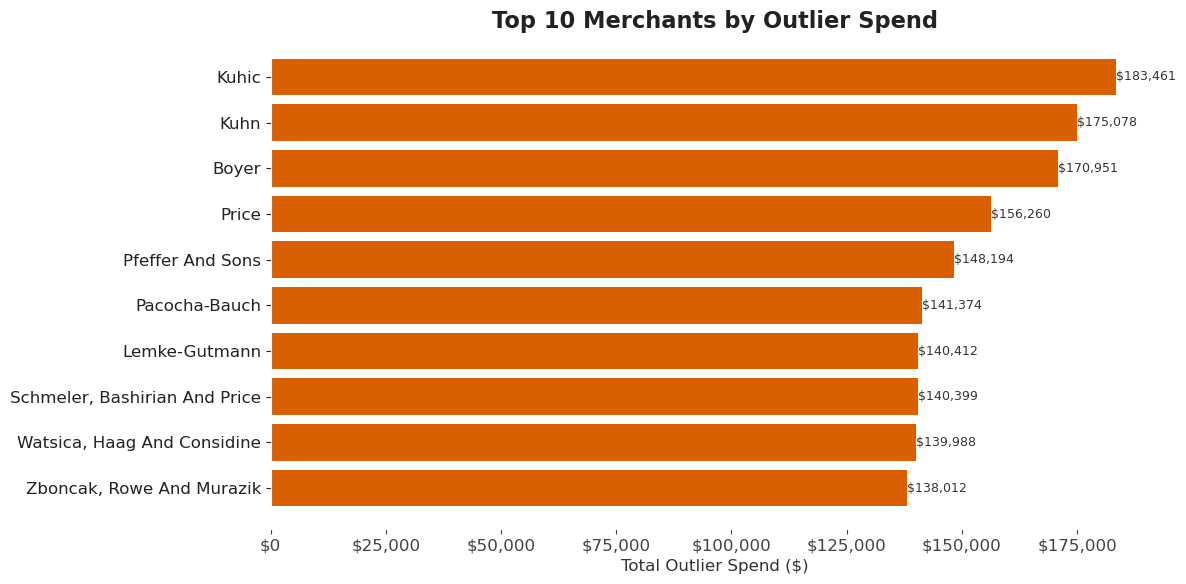

In [51]:
def plot_top_outlier_merchants(data, top_n=10):
    subset = data.head(top_n).sort_values("amt", ascending=True)
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=(12,6))
        bars = ax.barh(subset["merchant_clean"], subset["amt"], color="#D95F02")

        ax.set_title(f"Top {top_n} Merchants by Outlier Spend")
        ax.set_xlabel("Total Outlier Spend ($)")
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"${v:,.0f}"))

        for bar in bars:
            w = bar.get_width()
            ax.text(w, bar.get_y() + bar.get_height()/2, f"${w:,.0f}",
                    va="center", ha="left", fontsize=9, color="#333333")

        plt.tight_layout()
        plt.show()

plot_top_outlier_merchants(outlier_by_merchant, top_n=10)


### **Distance Analysis: Distribution of cust_merchant_km; flag long-distance anomalies**

In [53]:
# Step D1: Describe distance distribution with normal formatting
desc = df["cust_merchant_km"].describe(percentiles=[0.5, 0.9, 0.95, 0.99])

# Convert to DataFrame for nicer formatting
desc_df = desc.to_frame().T

# Format with 2 decimal places and thousands separator
desc_df = desc_df.applymap(lambda x: f"{x:,.2f}")

desc_df


C:\Users\Christopher\AppData\Local\Temp\ipykernel_1824\802229430.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_df = desc_df.applymap(lambda x: f"{x:,.2f}")


,count,mean,std,min,50%,90%,95%,99%,max
cust_merchant_km,"1,296,675.00",76.11,29.12,0.02,78.23,112.82,120.50,132.05,152.12


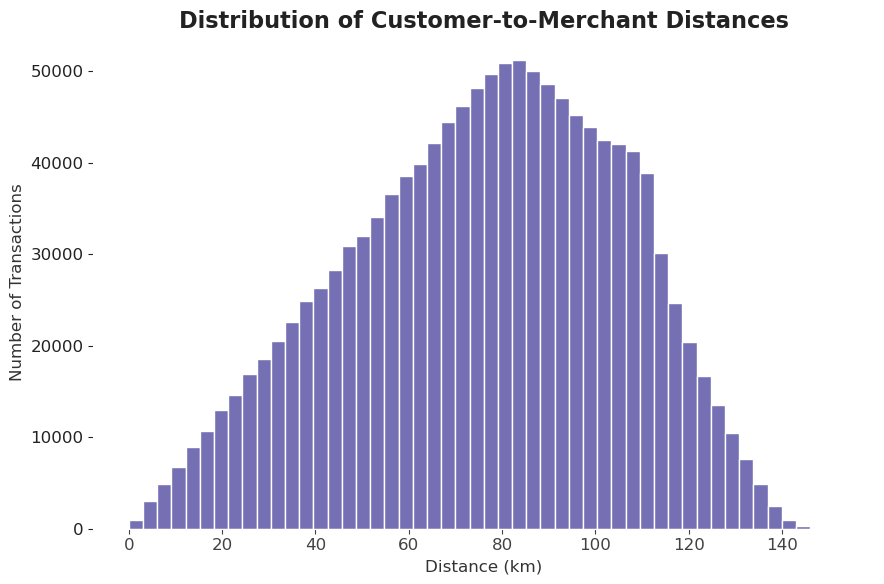

In [54]:
import matplotlib.pyplot as plt

with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(9,6))
    ax.hist(df["cust_merchant_km"], bins=50, color="#7570B3", edgecolor="white")
    ax.set_title("Distribution of Customer-to-Merchant Distances")
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Number of Transactions")
    plt.tight_layout()
    plt.show()


In [55]:
# Step D3: Flag long-distance transactions
LONG_DISTANCE_THRESHOLD = 500
df["is_long_distance"] = df["cust_merchant_km"] > LONG_DISTANCE_THRESHOLD

long_dist_share = df["is_long_distance"].mean() * 100
print(f"{long_dist_share:.2f}% of transactions are long-distance (> {LONG_DISTANCE_THRESHOLD} km)")


0.00% of transactions are long-distance (> 500 km)


In [56]:
# Step D4: Long-distance share by spend_group
long_dist_by_group = (
    df.groupby("spend_group")["is_long_distance"]
      .mean()
      .mul(100)
      .reset_index(name="long_distance_share_pct")
      .sort_values("long_distance_share_pct", ascending=False)
)

long_dist_by_group


,spend_group,long_distance_share_pct
0,Entertainment,0.0
1,Food & Beverage,0.0
2,Health & Wellness,0.0
3,Other / Miscellaneous,0.0
4,Shopping & Personal,0.0
5,Travel,0.0


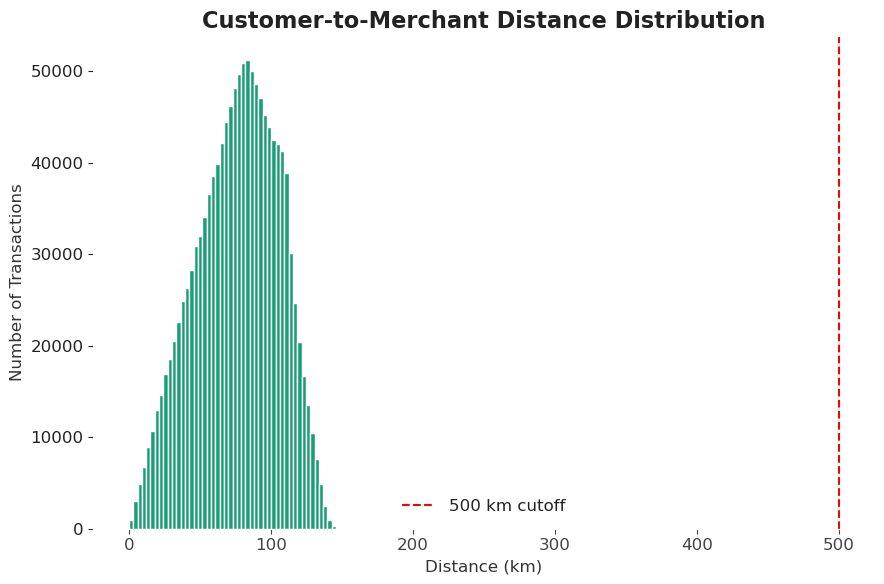

In [57]:
with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(9,6))
    ax.hist(df["cust_merchant_km"], bins=50, color="#1B9E77", edgecolor="white")
    ax.axvline(LONG_DISTANCE_THRESHOLD, color="red", linestyle="--", label=f"{LONG_DISTANCE_THRESHOLD} km cutoff")
    ax.set_title("Customer-to-Merchant Distance Distribution")
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Number of Transactions")
    ax.legend()
    plt.tight_layout()
    plt.show()


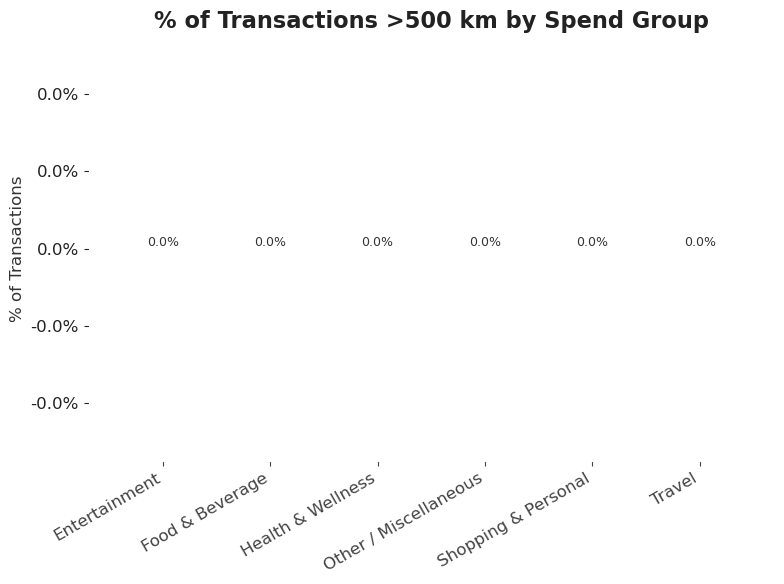

In [58]:
def plot_long_distance_by_group(data, group_col="spend_group", value_col="long_distance_share_pct"):
    with use_rc(chart_rc()):
        fig, ax = plt.subplots(figsize=(8,6))
        bars = ax.bar(
            data[group_col],
            data[value_col],
            color=[GROUP_COLORS.get(g, "#999999") for g in data[group_col]]
        )
        ax.set_title("% of Transactions >500 km by Spend Group")
        ax.set_ylabel("% of Transactions")
        ax.set_xlabel("")
        import matplotlib.ticker as mticker
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"{v:.1f}%"))
        plt.xticks(rotation=30, ha="right")

        for bar, val in zip(bars, data[value_col]):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f"{val:.1f}%", ha="center", va="bottom", fontsize=9, color="#333333")

        plt.tight_layout()
        plt.show()

plot_long_distance_by_group(long_dist_by_group)


In [59]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

95th percentile distance cutoff: 120.5 km
             spend_group  long_distance_share_pct
0          Entertainment                 4.870551
1        Food & Beverage                 5.018595
2      Health & Wellness                 4.854505
3  Other / Miscellaneous                 5.041905
4    Shopping & Personal                 5.016420
5                 Travel                 5.028867


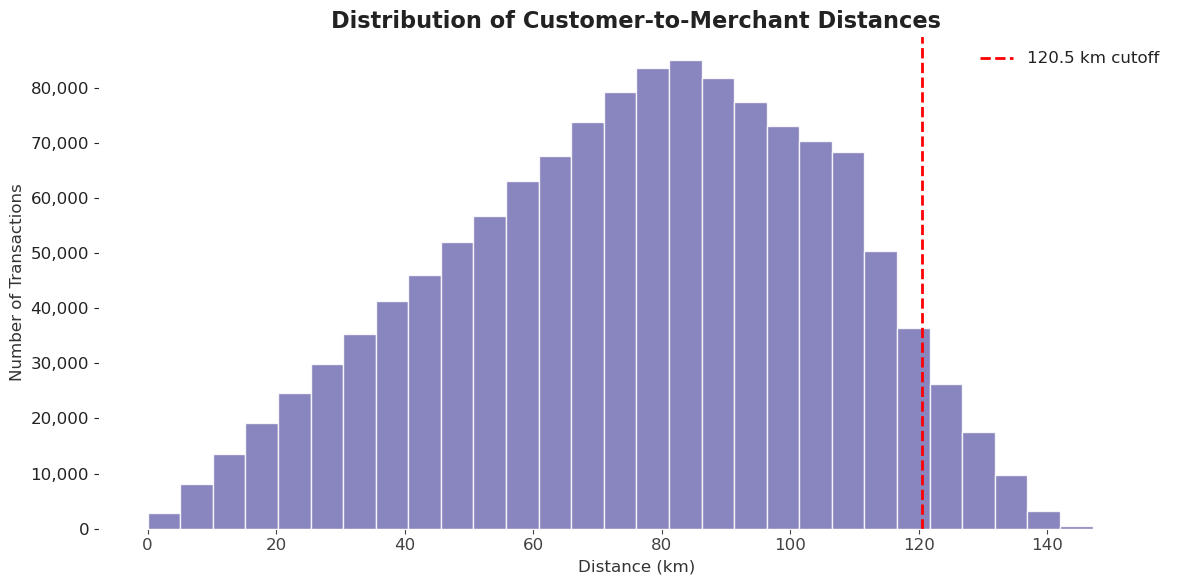

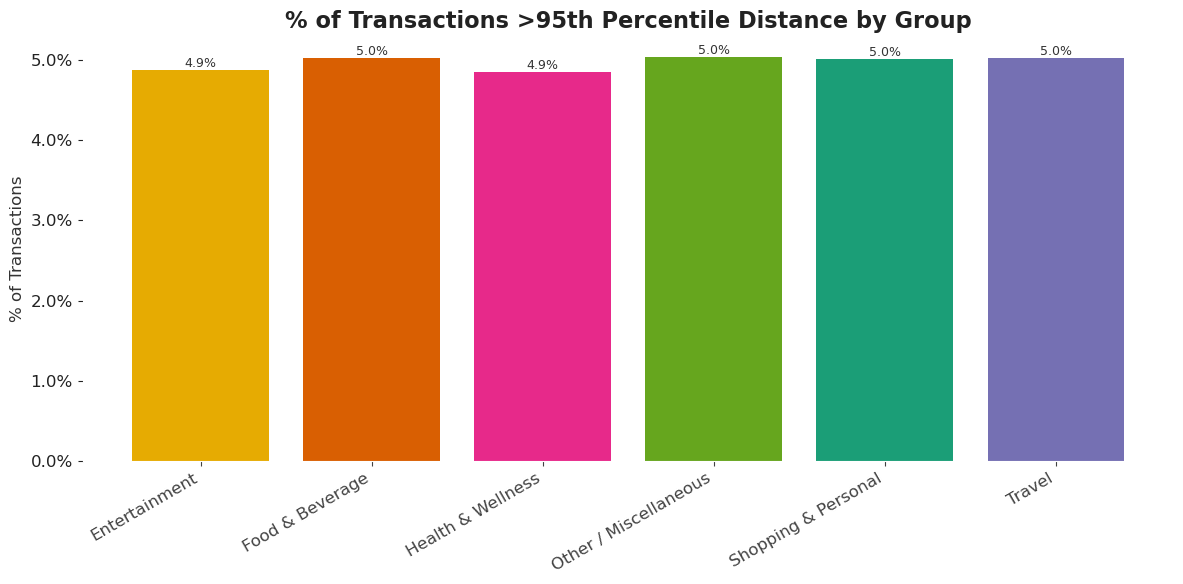

In [60]:
# ===========================================
# 3e. Distance Analysis (95th percentile rule)
# ===========================================

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Step D1: Identify threshold based on percentiles
threshold = df["cust_merchant_km"].quantile(0.95)
print(f"95th percentile distance cutoff: {threshold:.1f} km")

# Step D2: Flag anomalies
df["long_distance_flag"] = df["cust_merchant_km"] > threshold

# Step D3: Share of flagged transactions by spend_group
ld_share = (
    df.groupby("spend_group")["long_distance_flag"]
      .mean()
      .reset_index()
      .rename(columns={"long_distance_flag": "long_distance_share_pct"})
)
ld_share["long_distance_share_pct"] *= 100
print(ld_share)

# # Step D4: Histogram of distances with threshold line
# with use_rc(chart_rc()):
#     fig, ax = plt.subplots(figsize=(12,6))
#     ax.hist(df["cust_merchant_km"], bins=60, color="#7570B3", alpha=0.8)
#     ax.axvline(threshold, color="red", linestyle="--", label=f"{threshold:.1f} km cutoff")
#     ax.set_title("Distribution of Customer-to-Merchant Distances")
#     ax.set_xlabel("Distance (km)")
#     ax.set_ylabel("Number of Transactions")
#     ax.legend()
#     plt.tight_layout()
#     plt.show()

# Step D4: Histogram of distances with threshold line (improved style)
with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.hist(
        df["cust_merchant_km"],
        bins=30,                     # fewer bins = smoother, clearer
        color="#7570B3",
        edgecolor="white",           # white edges for definition
        alpha=0.85
    )
    ax.axvline(threshold, color="red", linestyle="--", linewidth=2, label=f"{threshold:.1f} km cutoff")

    ax.set_title("Distribution of Customer-to-Merchant Distances")
    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Number of Transactions")

    # Use commas for large y-axis numbers
    import matplotlib.ticker as mticker
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

    ax.legend()
    plt.tight_layout()
    plt.show()


# Step D5: Bar plot of flagged transactions by group
with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(12,6))
    bars = ax.bar(
        ld_share["spend_group"],
        ld_share["long_distance_share_pct"],
        color=[GROUP_COLORS.get(g, "#999999") for g in ld_share["spend_group"]],
    )
    ax.set_title("% of Transactions >95th Percentile Distance by Group")
    ax.set_ylabel("% of Transactions")
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

    # Annotate percentages
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{height:.1f}%",
            ha="center", va="bottom", fontsize=9, color="#333333"
        )

    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


In [61]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,age,age_band,cust_merchant_km,is_outlier_amt,txn_size_band,merchant_has_fraud_tag,merchant_clean,spend_group,month,is_recurring_pair,is_long_distance,long_distance_flag
0,2019-01-01 00:00:18,2703186189652095,"Fraud_Rippin, Kub And Mann",Misc_Net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, Counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705,30.8,25–34,78.597677,False,Small,True,"Rippin, Kub And Mann",Other / Miscellaneous,2019-01,False,False,False
1,2019-01-01 00:00:44,630423337322,"Fraud_Heller, Gutmann And Zieme",Grocery_Pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special Educational Needs Teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,<NA>,40.5,35–44,30.212217,False,Medium,True,"Heller, Gutmann And Zieme",Food & Beverage,2019-01,False,False,False
2,2019-01-01 00:00:51,38859492057661,Fraud_Lind-Buckridge,Entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature Conservation Officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236,57.0,55–64,108.206232,True,Medium,True,Lind-Buckridge,Entertainment,2019-01,False,False,False
3,2019-01-01 00:01:16,3534093764340240,"Fraud_Kutch, Hermiston And Farrell",Gas_Transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent Attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,<NA>,52.0,45–54,95.673363,False,Small,True,"Kutch, Hermiston And Farrell",Travel,2019-01,False,False,False
4,2019-01-01 00:03:06,375534208663984,Fraud_Keeling-Crist,Misc_Pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance Movement Psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844,32.8,25–34,77.556851,False,Small,True,Keeling-Crist,Other / Miscellaneous,2019-01,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,Fraud_Reichel Inc,Entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,<NA>,58.6,55–64,119.752302,False,Small,True,Reichel,Entertainment,2020-06,False,False,False
1296671,2020-06-21 12:12:19,6011149206456997,Fraud_Abernathy And Sons,Food_Dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production Assistant, Television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630,40.5,35–44,75.104189,False,Medium,True,Abernathy And Sons,Food & Beverage,2020-06,False,False,False
1296672,2020-06-21 12:12:32,3514865930894695,Fraud_Stiedemann Ltd,Food_Dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval Architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351,52.8,45–54,99.047870,False,Medium,True,Stiedemann,Food & Beverage,2020-06,False,False,False
1296673,2020-06-21 12:13:36,2720012583106919,"Fraud_Reinger, Weissnat And Strosin",Food_Dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer Coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367,39.8,35–44,84.627769,False,Medium,True,"Reinger, Weissnat And Strosin",Food & Beverage,2020-06,False,False,False


In [62]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'age', 'age_band',
       'cust_merchant_km', 'is_outlier_amt', 'txn_size_band',
       'merchant_has_fraud_tag', 'merchant_clean', 'spend_group', 'month',
       'is_recurring_pair', 'is_long_distance', 'long_distance_flag'],
      dtype='object')

In [63]:
# Step DEMO1: Create age bands
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
labels = ["<18", "18–24", "25–34", "35–44", "45–54", "55–64", "65–74", "75+"]
df["age_band"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Check distribution
df["age_band"].value_counts(dropna=False).sort_index()


age_band
<18       15361
18–24    105462
25–34    286211
35–44    273753
45–54    257369
55–64    163886
65–74    101126
75+       93507
Name: count, dtype: int64

C:\Users\Christopher\AppData\Local\Temp\ipykernel_1824\479044931.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_band")["amt"]


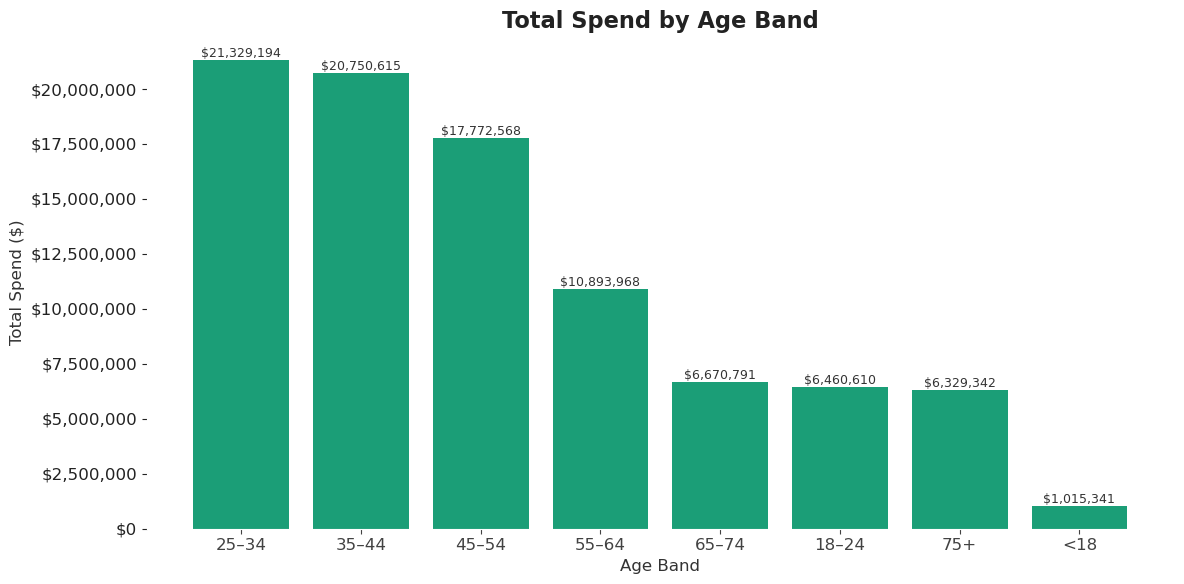

In [64]:
# Total spend by age band
age_spend = (
    df.groupby("age_band")["amt"]
      .sum()
      .reset_index()
      .sort_values("amt", ascending=False)
)

with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(12,6))
    bars = ax.bar(age_spend["age_band"], age_spend["amt"], color="#1B9E77")

    ax.set_title("Total Spend by Age Band")
    ax.set_xlabel("Age Band")
    ax.set_ylabel("Total Spend ($)")

    import matplotlib.ticker as mticker
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"${v:,.0f}"))

    for bar, val in zip(bars, age_spend["amt"]):
        ax.text(bar.get_x() + bar.get_width()/2, val, f"${val:,.0f}",
                ha="center", va="bottom", fontsize=9, color="#333333")

    plt.tight_layout()
    plt.show()


C:\Users\Christopher\AppData\Local\Temp\ipykernel_1824\1445830946.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("gender")["amt"]


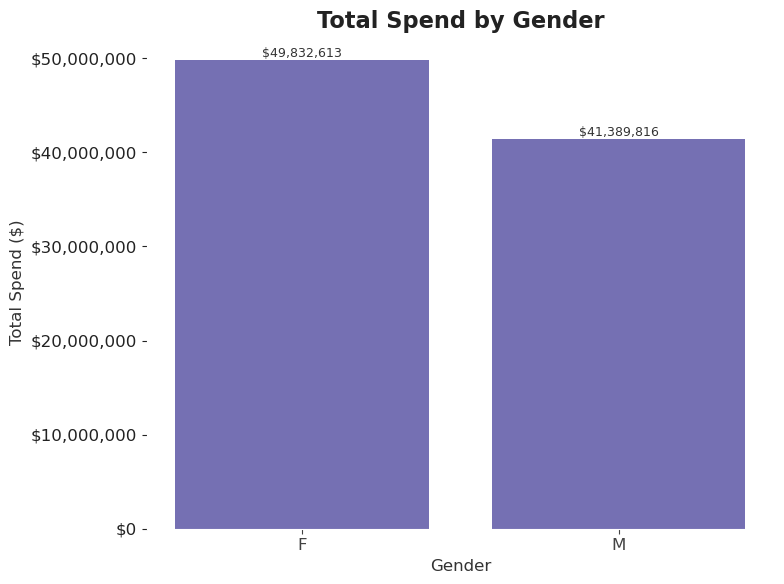

In [65]:
# Total spend by gender
gender_spend = (
    df.groupby("gender")["amt"]
      .sum()
      .reset_index()
      .sort_values("amt", ascending=False)
)

with use_rc(chart_rc()):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(gender_spend["gender"], gender_spend["amt"], color="#7570B3")

    ax.set_title("Total Spend by Gender")
    ax.set_xlabel("Gender")
    ax.set_ylabel("Total Spend ($)")
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"${v:,.0f}"))

    for bar, val in zip(bars, gender_spend["amt"]):
        ax.text(bar.get_x() + bar.get_width()/2, val, f"${val:,.0f}",
                ha="center", va="bottom", fontsize=9, color="#333333")

    plt.tight_layout()
    plt.show()


C:\Users\Christopher\AppData\Local\Temp\ipykernel_1824\264356104.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df["trans_date_trans_time"].dt.to_period("M"), "age_band"])["amt"]


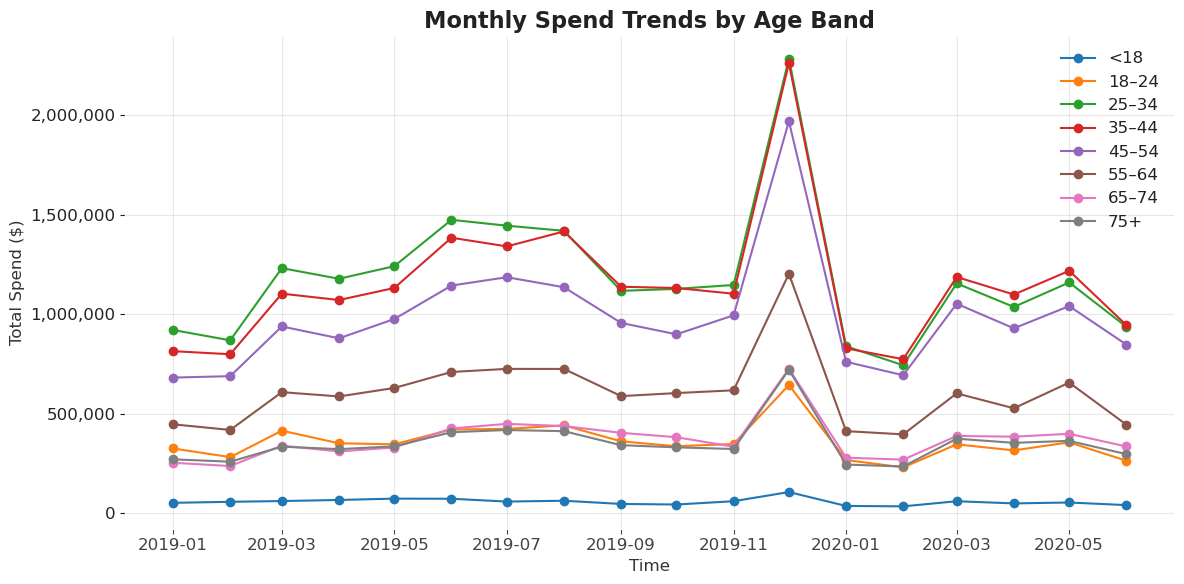

In [66]:
monthly_age = (
    df.groupby([df["trans_date_trans_time"].dt.to_period("M"), "age_band"])["amt"]
      .sum()
      .reset_index()
      .rename(columns={"trans_date_trans_time": "period"})
)
monthly_age["period_end"] = monthly_age["period"].dt.to_timestamp()
monthly_age = monthly_age.rename(columns={"amt": "value", "age_band": "series"})

custom_chart_v1(
    monthly_age,
    x_col="period_end",
    y_col="value",
    series_col="series",
    title="Monthly Spend Trends by Age Band",
    ylabel="Total Spend ($)"
)


C:\Users\Christopher\AppData\Local\Temp\ipykernel_1824\3726359995.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([df["trans_date_trans_time"].dt.to_period("M"), "gender"])["amt"]


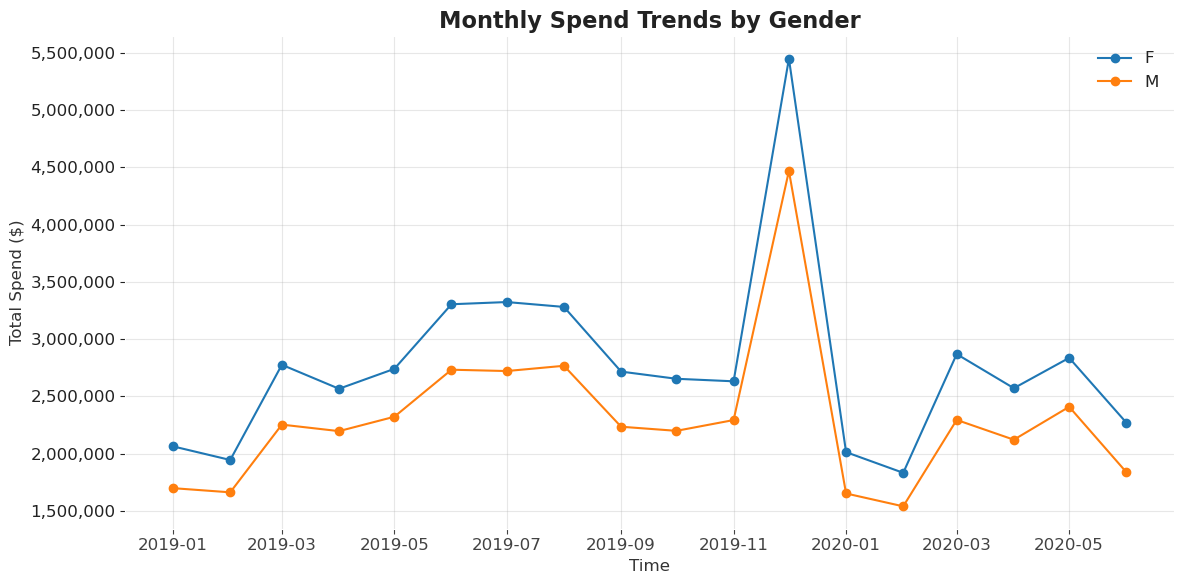

In [67]:
monthly_gender = (
    df.groupby([df["trans_date_trans_time"].dt.to_period("M"), "gender"])["amt"]
      .sum()
      .reset_index()
      .rename(columns={"trans_date_trans_time": "period"})
)
monthly_gender["period_end"] = monthly_gender["period"].dt.to_timestamp()
monthly_gender = monthly_gender.rename(columns={"amt": "value", "gender": "series"})

custom_chart_v1(
    monthly_gender,
    x_col="period_end",
    y_col="value",
    series_col="series",
    title="Monthly Spend Trends by Gender",
    ylabel="Total Spend ($)"
)
